# Exploratory analysis of the incidents temperal pattern

In [248]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
q1 = pd.read_csv('data/Incidents/incidentsQ1.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)
q2 = pd.read_csv('data/Incidents/incidentsQ2.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)
q3 = pd.read_csv('data/Incidents/incidentsQ3.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)
q4 = pd.read_csv('data/Incidents/incidentsQ4.csv', index_col='callstart', infer_datetime_format=True, parse_dates=True)

In [260]:
incident_lsoa = year.groupby('lsoa')['incidentid'].count()

In [261]:
incident_lsoa.to_csv('incident_lsoa.csv')

In [3]:
year = pd.concat([q1, q2, q3, q4], axis=0)
year = year.applymap(lambda x: x.strip() if type(x)==str else x)

In [223]:
q3 = q3.applymap(lambda x: x.strip() if type(x)==str else x)

In [227]:
q3.columns

Index(['incidentid', 'age', 'sex', 'lat_incident', 'lon_incident', 'borough',
       'ccgname', 'ccgcluster', 'lsoa', 'wardname', 'wardID', 'callconcluded',
       'T0_T5CallConnectToCallConcluded', 'mps', 'ht', 'dohcategory',
       'chiefcomplaintcode', 'chiefcomplaint', 'ampdscode', 'description',
       'arrivedatscene_aqi', 'response_aqi', 'vehiclesarrived',
       'totalonscenetime', 'totaljobcycletime', 'alcoholrelated',
       'hospitalcode', 'conveyed', 'conveyed_ed', 'cntd__incidenttype',
       'min__incidenttype', 'max__incidenttype', 'cntd__illnesstype',
       'min__illnesstype', 'max__illnesstype'],
      dtype='object')

In [4]:
def plot_category(datafram, category='dohcategory', frequency='W'):
    df = datafram
    unique_ = df[category].unique()
    dfs = []
    plt.clf()
    plt.figure(figsize=(20,10))
    for c in unique_:
        df_c = df[df[category] == c].resample(frequency)['incidentid'].count()
        df_c.plot(label=str(c))
    plt.legend()
        

<Figure size 432x288 with 0 Axes>

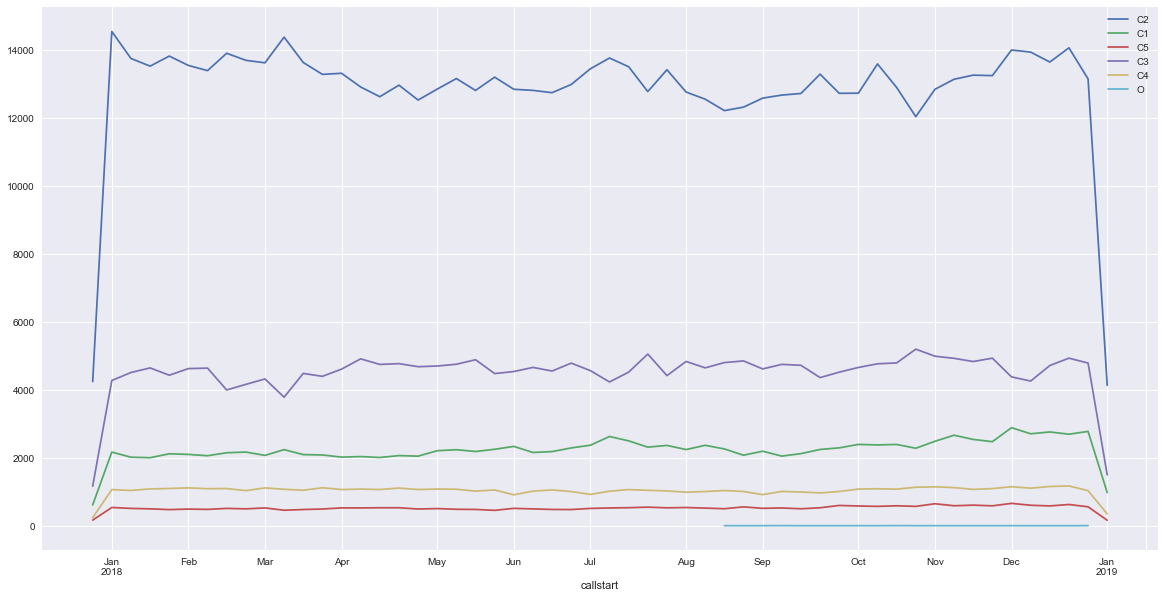

In [5]:
plot_category(year)

In [12]:
yW = year.resample('W')['incidentid'].count()

<Figure size 432x288 with 0 Axes>

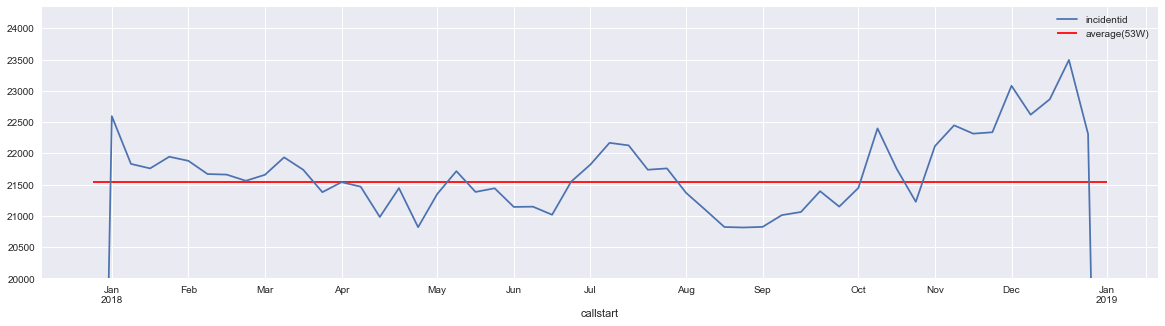

In [25]:
plt.clf()
plt.figure(figsize=(20,5))
yW.plot()
xticks = pd.date_range(start=yW.index.values.min(), end=yW.index.values.max(), freq='W')
#plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90)
plt.ylim(bottom=20000)
plt.hlines(y=yW.sum()/53, xmin=yW.index.values.min(), xmax=yW.index.values.max(), color='r', label='average(53W)')
plt.legend()
plt.plot()

In [15]:
q1h3 = q1.resample('3H')['incidentid'].count()

<Figure size 432x288 with 0 Axes>

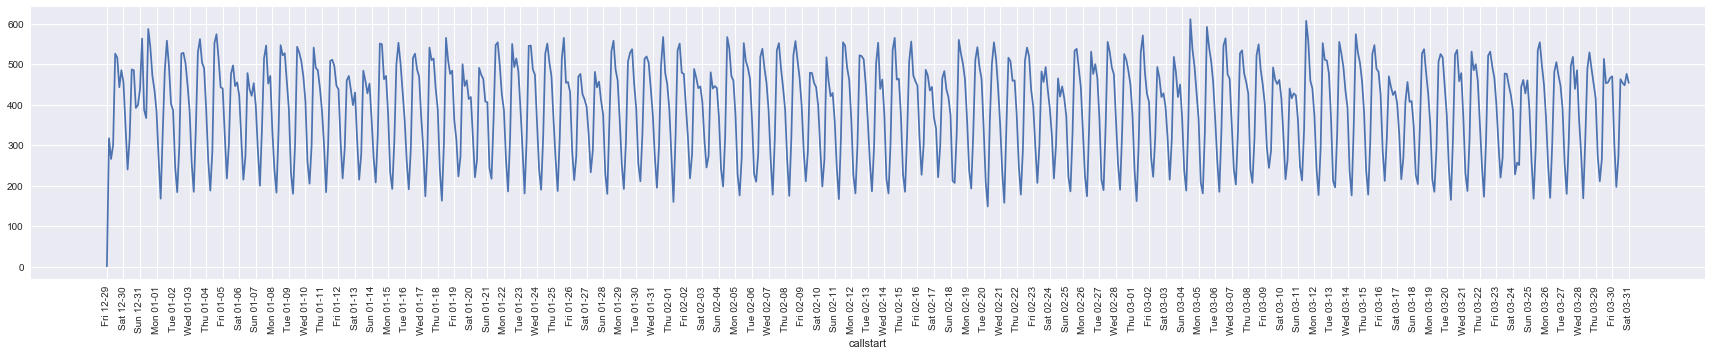

In [16]:
plt.clf()
plt.figure(figsize=(30,5))
q1h3.plot()
xticks = pd.date_range(start=q1h3.index.values.min(), end=q1h3.index.values.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90)
plt.show()

In [7]:
q1gb = q1.groupby(q1.index.hour)['incidentid'].count()

Text(0, 0.5, 'Frequency')

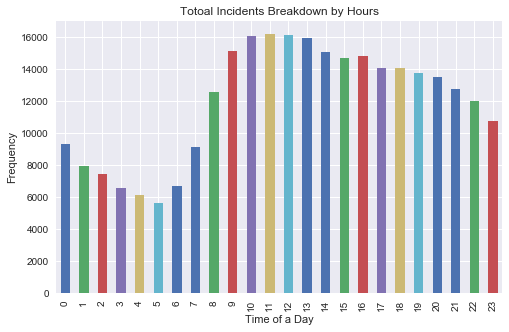

In [34]:
plt.figure(figsize=(8,5))
q1gb.plot(kind='bar')
plt.title('Totoal Incidents Breakdown by Hours')
plt.xlabel('Time of a Day')
plt.ylabel('Frequency')

In [19]:
gb = q1.groupby([q1.index.hour, q1.dohcategory])['incidentid'].count()

Text(0, 0.5, 'Frequency')

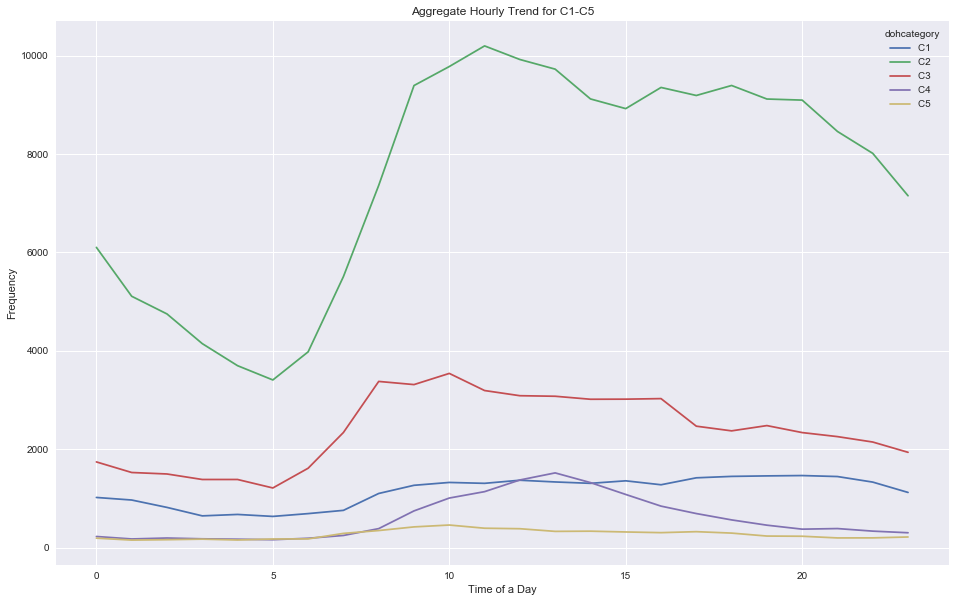

In [31]:
fig, ax = plt.subplots(figsize=(16,10))
gb.unstack().plot(ax=ax)
plt.title('Aggregate Hourly Trend for C1-C5')
plt.xlabel('Time of a Day')
plt.ylabel('Frequency')

# Mean response time per lsoa per category

In [275]:
year.tail()

incidentid   age sex  lat_incident  lon_incident  \
callstart                                                                   
2019-01-01 23:58:53  20190101006804  40.0   M        51.460        -0.010   
2019-01-01 23:58:55  20190101006805  90.0   F        51.505        -0.200   
2019-01-01 23:58:30  20190101006807  40.0   M        51.595         0.025   
2019-01-01 23:57:36  20190101006808  20.0   M        51.310        -0.130   
2019-01-01 23:59:47  20190101006809   5.0   F        51.490         0.105   

                                    borough  \
callstart                                     
2019-01-01 23:58:53                Lewisham   
2019-01-01 23:58:55  Kensington and Chelsea   
2019-01-01 23:58:30               Redbridge   
2019-01-01 23:57:36                 Croydon   
2019-01-01 23:59:47               Greenwich   

                                                               ccgname  \
callstart                                                                
2019-01-01 23:58:53                                   NHS Lewisham CCG   
2019-01-01 23:58:55  NHS West London (Kensington and Chelsea, Queen...   
2019-01-01 23:58:30                                  NHS Redbridge CCG   
2019-01-01 23:57:36                                    NHS Croydon CCG   
2019-01-01 23:59:47                                  NHS Greenwich CCG   

                     ccgcluster       lsoa       wardname  wardID  \
callstart                                                           
2019-01-01 23:58:53  South East  E01003199     Blackheath  00AZGE   
2019-01-01 23:58:55  North West  E01002883      Pembridge  00AWGL   
2019-01-01 23:58:30  North East  E01003674     Church End  00BCGC   
2019-01-01 23:57:36  South West  E01001015  Coulsdon East  00AHGJ   
2019-01-01 23:59:47  South East  E01001579     Abbey Wood  00ALGP   

                               callconcluded  T0_T5CallConnectToCallConcluded  \
callstart                                                                       
2019-01-01 23:58:53  2019-01-02 00:02:39.000                            226.0   
2019-01-01 23:58:55  2019-01-02 00:03:36.000                            281.0   
2019-01-01 23:58:30  2019-01-02 00:01:11.000                            161.0   
2019-01-01 23:57:36  2019-01-02 00:07:58.000                            622.0   
2019-01-01 23:59:47  2019-01-02 00:19:11.000                           1164.0   

                     mps  ht dohcategory  chiefcomplaintcode  \
callstart                                                      
2019-01-01 23:58:53    0   0          C2                35.0   
2019-01-01 23:58:55    0   0          C3                 1.0   
2019-01-01 23:58:30    0   0          C3               111.0   
2019-01-01 23:57:36    0   0          C2                25.0   
2019-01-01 23:59:47    0   0          C1                17.0   

                                                        chiefcomplaint  \
callstart                                                                
2019-01-01 23:58:53                 Health Care Professional Admission   
2019-01-01 23:58:55                          Abdominal Pain / Problems   
2019-01-01 23:58:30                                   NHS 111 Transfer   
2019-01-01 23:57:36  Psychiatric / Abnormal Behaviour / Suicide Att...   
2019-01-01 23:59:47                                              Falls   

                    ampdscode  \
callstart                       
2019-01-01 23:58:53     35D3A   
2019-01-01 23:58:55       1A1   
2019-01-01 23:58:30     Dx012   
2019-01-01 23:57:36     25B1B   
2019-01-01 23:59:47      17D3   

                                                           description  \
callstart                                                                
2019-01-01 23:58:53  HCP & AED On scene (immediately life threateni...   
2019-01-01 23:58:55                                     Abdominal Pain   
2019-01-01 23:58:30          Emergency Ambulance Response (Category 3)   
2019-01-01 23:

In [43]:
lsogb = year.groupby(['lsoa', 'dohcategory'])['response_aqi'].mean()

In [45]:
lsoa = gpd.read_file('ESRI/LSOA_2011_London_gen_MHW.shp')

In [229]:
year.columns

Index(['incidentid', 'age', 'sex', 'lat_incident', 'lon_incident', 'borough',
       'ccgname', 'ccgcluster', 'lsoa', 'wardname', 'wardID', 'callconcluded',
       'T0_T5CallConnectToCallConcluded', 'mps', 'ht', 'dohcategory',
       'chiefcomplaintcode', 'chiefcomplaint', 'ampdscode', 'description',
       'arrivedatscene_aqi', 'response_aqi', 'vehiclesarrived',
       'totalonscenetime', 'totaljobcycletime', 'alcoholrelated',
       'hospitalcode', 'conveyed', 'conveyed_ed', 'cntd__incidenttype',
       'min__incidenttype', 'max__incidenttype', 'cntd__illnesstype',
       'min__illnesstype', 'max__illnesstype', 'response_aqi_min'],
      dtype='object')

In [241]:
q3['response_aqi_min'] = q3['response_aqi'] / 60

In [269]:
def plot_mean_percentile(C='C1', mean_=7, percentile_=15):
    #prepare dataframe, calculate stats, and geodataframize the dataset
    year_C = year[year.dohcategory == C]
    mean = year_C.groupby('lsoa')['response_aqi_min'].mean().reset_index().rename(columns={'response_aqi_min': "mean_response"})
    percentile90 = year_C.groupby('lsoa')['response_aqi_min'].quantile(0.9).reset_index().rename(columns={'response_aqi_min': "percentile90_response"})
    combined = pd.merge(mean, percentile90, on='lsoa')
    geo_combined = combined.merge(lsoa, left_on='lsoa', right_on='LSOA11CD')[['lsoa', 'mean_response', 'percentile90_response','geometry']]
    geo_combined = gpd.GeoDataFrame(geo_combined)
    
    #plot the mean_response
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    geo_combined[geo_combined.mean_response > mean_].plot(column='mean_response', color='red', ax=ax[0], alpha=1)
    geo_combined.plot(column='mean_response', cmap='summer', legend=False, ax=ax[0], alpha=0.5)
    ax[0].set_axis_off()
    ax[0].set_title(str(C) + ' Mean Response_aqi < ' + str(mean_) + ' mins per lsoa', fontsize=20)
    
    #plot the 90 percentile response
    geo_combined[geo_combined.percentile90_response > percentile_].plot(column='percentile90_response', color='red', ax=ax[1], alpha=1)
    geo_combined.plot(column='percentile90_response', cmap='summer', legend=False, ax=ax[1], alpha=0.5)
    ax[1].set_axis_off()
    ax[1].set_title(str(C) + ' 90 Percentile Response_aqi < ' + str(percentile_) + ' mins per lsoa', fontsize=20)
    
    print('The percentage of lsoa that ', C, ' Mean Response_aqi < ', mean_, ' mins is: ', (geo_combined[geo_combined.mean_response < mean_].count() / geo_combined.mean_response.count())[0])
    print('The percentage of lsoa that ', C,' 90 Percentile Response_aqi < ', percentile_, ' mins is: ', 
          (geo_combined[geo_combined.percentile90_response < percentile_].count() / geo_combined.percentile90_response.count())[0])
    

The percentage of lsoa that  C1  Mean Response_aqi <  7  mins is:  0.03231365790607497
The percentage of lsoa that  C1  90 Percentile Response_aqi <  15  mins is:  0.3104265402843602


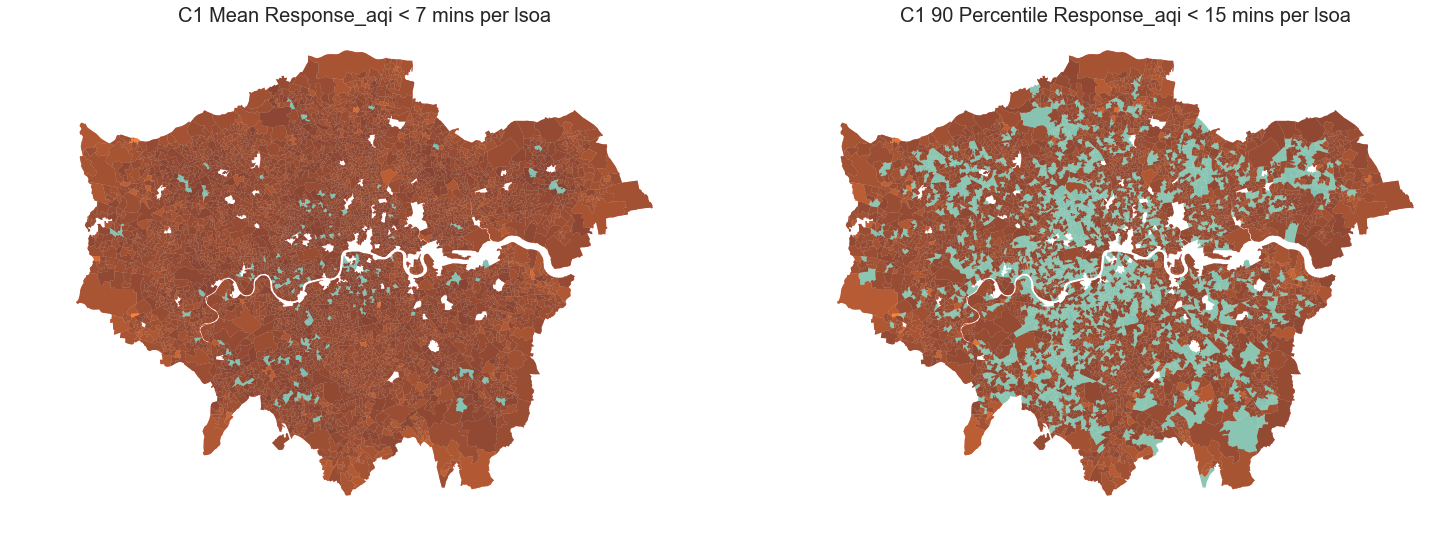

In [270]:
plot_mean_percentile('C1', 7, 15)

The percentage of lsoa that  C2  Mean Response_aqi <  18  mins is:  0.3937957776820336
The percentage of lsoa that  C2  90 Percentile Response_aqi <  40  mins is:  0.6087893149504524


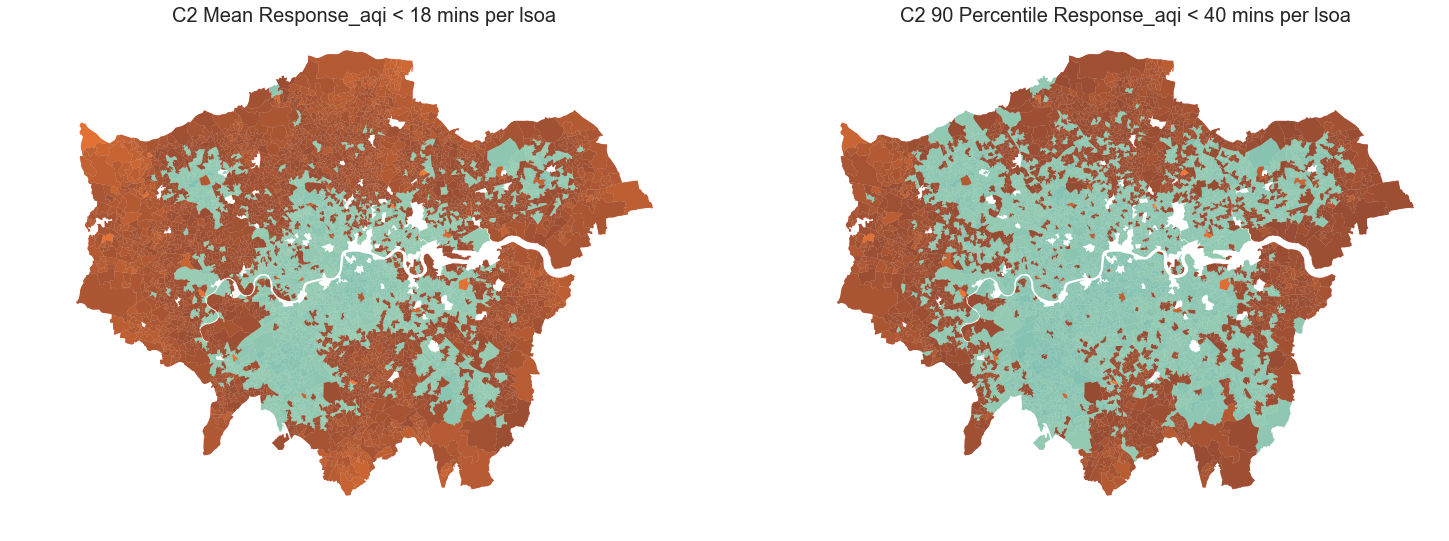

In [271]:
plot_mean_percentile('C2', 18, 40)

The percentage of lsoa that  C3  Mean Response_aqi <  60  mins is:  0.6583369237397674
The percentage of lsoa that  C3  90 Percentile Response_aqi <  120  mins is:  0.47824213700990953


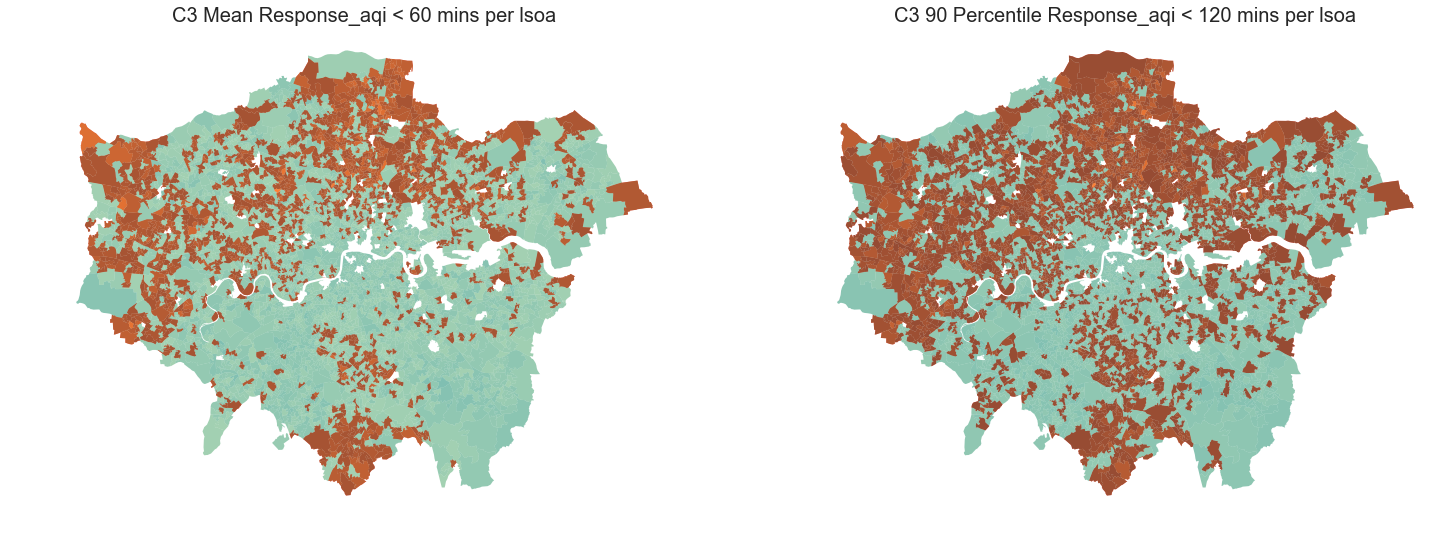

In [272]:
plot_mean_percentile('C3', 60, 120)

The percentage of lsoa that  C4  Mean Response_aqi <  180  mins is:  0.9438908145580589
The percentage of lsoa that  C4  90 Percentile Response_aqi <  180  mins is:  0.4120450606585789


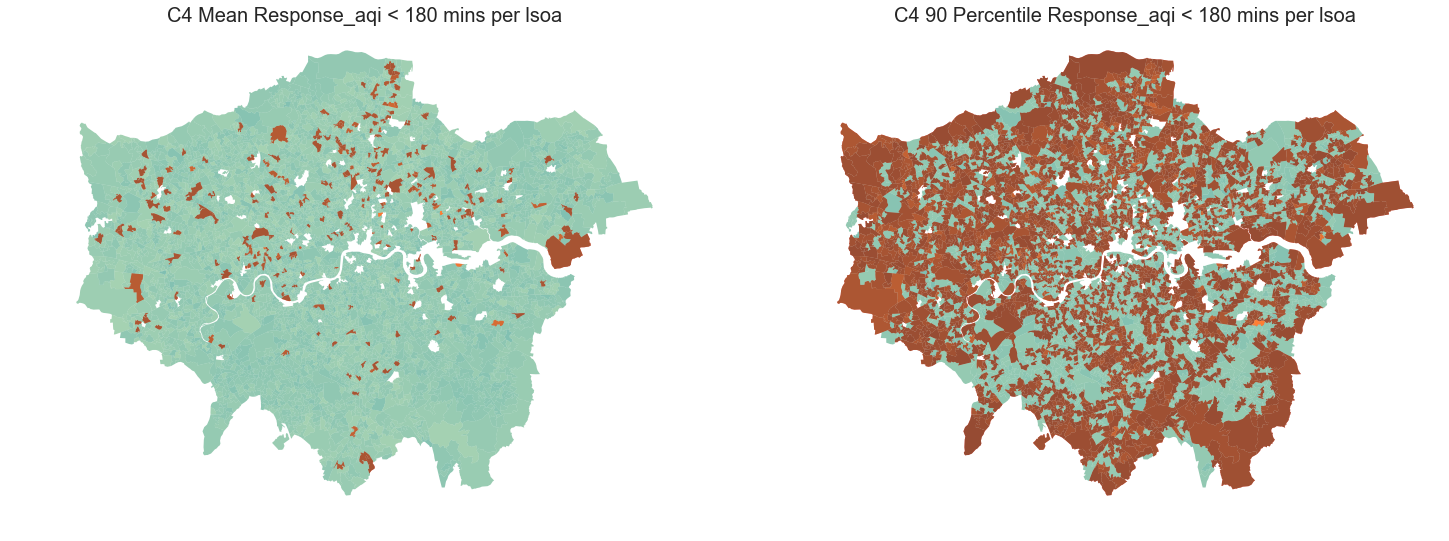

In [273]:
plot_mean_percentile('C4', 180, 180)

Text(0.5, 1.0, 'C1 avg Response_aqi < 15 mins per lsoa')

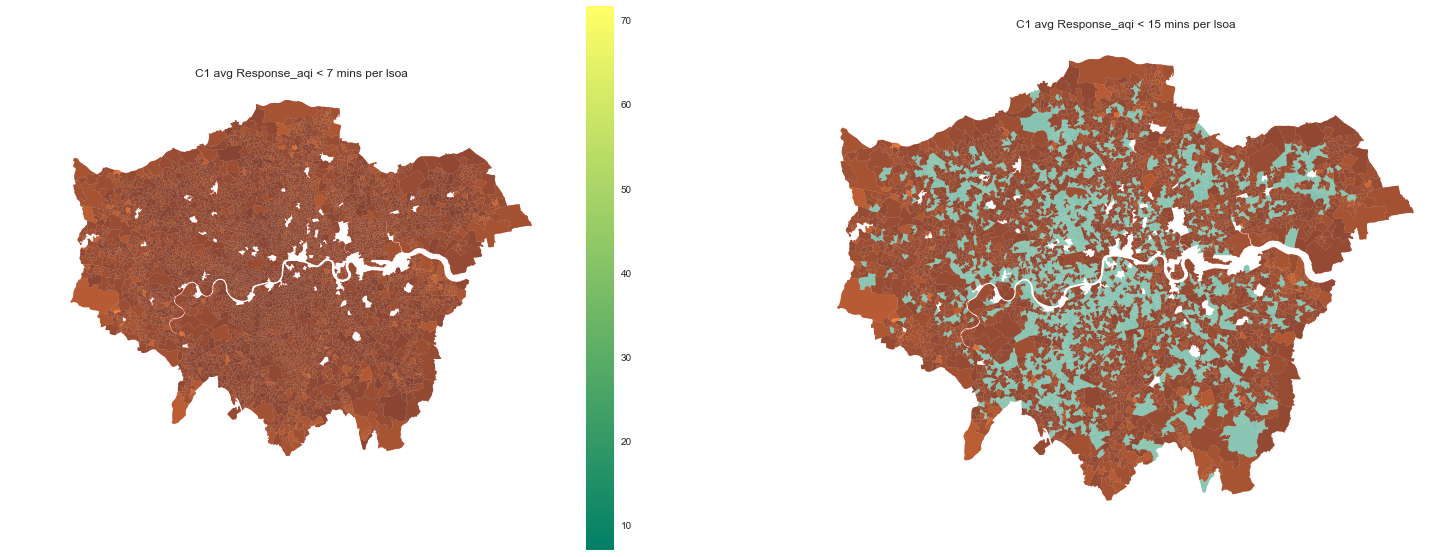

In [160]:
year_c1 = year[year.dohcategory == 'C1']
year_c1 = year_c1.groupby('lsoa')['response_aqi_min'].quantile(0.9).reset_index().merge(lsoa, left_on='lsoa', 
                                                                             right_on='LSOA11CD')[['lsoa', 'response_aqi_min', 'geometry']]
year_c1 = gpd.GeoDataFrame(year_c1)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

year_c1[year_c1.response_aqi_min > 7].plot(column='response_aqi_min', color='red', ax=ax[0], alpha=1)
year_c1.plot(column='response_aqi_min', cmap='summer', legend=True, ax=ax[0], alpha=0.5)
ax[0].set_axis_off()
ax[0].set_title('C1 avg Response_aqi < 7 mins per lsoa')

year_c1[year_c1.response_aqi_min > 15].plot(column='response_aqi_min', color='red', ax=ax[1], alpha=1)
year_c1.plot(column='response_aqi_min', cmap='summer', legend=False, ax=ax[1], alpha=0.5)
ax[1].set_axis_off()
ax[1].set_title('C1 avg Response_aqi < 15 mins per lsoa')

Text(0.5, 1.0, 'C2 avg Response_aqi < 40 mins per lsoa')

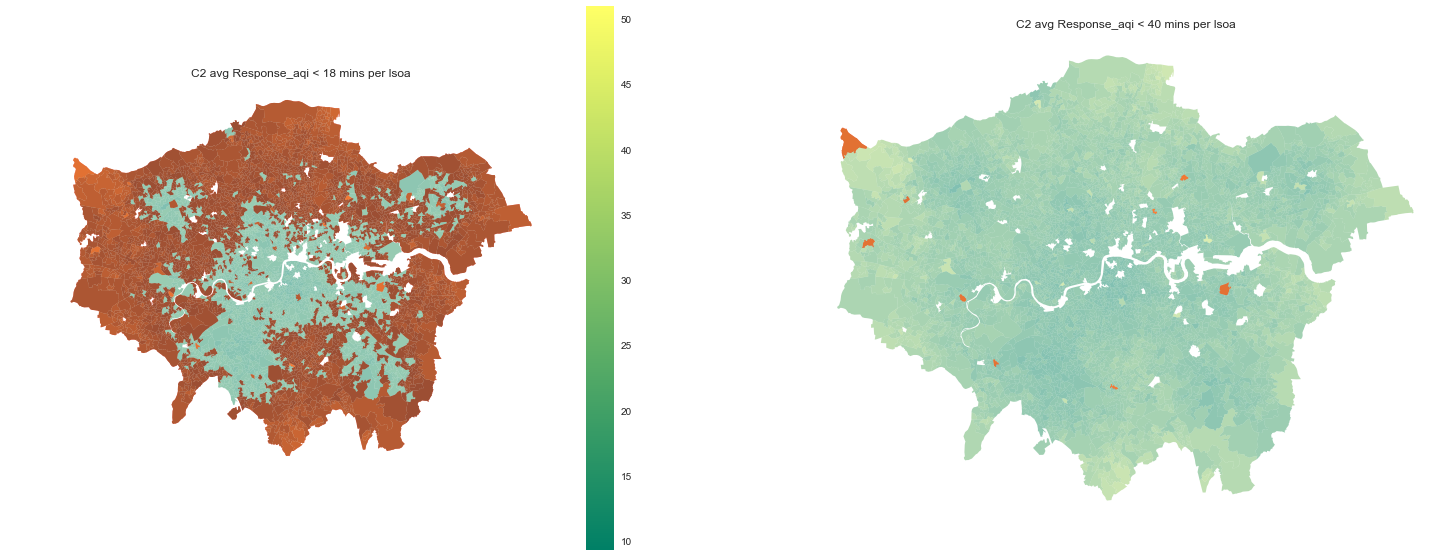

In [137]:
year_c2 = year[year.dohcategory == 'C2']
year_c2 = year_c2.groupby('lsoa')['response_aqi_min'].mean().reset_index().merge(lsoa, left_on='lsoa', 
                                                                             right_on='LSOA11CD')[['lsoa', 'response_aqi_min', 'geometry']]
year_c2 = gpd.GeoDataFrame(year_c2)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

year_c2[year_c2.response_aqi_min > 18].plot(column='response_aqi_min', color='red', ax=ax[0], alpha=1)
year_c2.plot(column='response_aqi_min', cmap='summer', legend=True, ax=ax[0], alpha=0.5)
ax[0].set_axis_off()
ax[0].set_title('C2 avg Response_aqi < 18 mins per lsoa')

year_c2[year_c2.response_aqi_min > 40].plot(column='response_aqi_min', color='red', ax=ax[1], alpha=1)
year_c2.plot(column='response_aqi_min', cmap='summer', legend=False, ax=ax[1], alpha=0.5)
ax[1].set_axis_off()
ax[1].set_title('C2 avg Response_aqi < 40 mins per lsoa')

Text(0.5, 1.0, 'C3 avg Response_aqi > 120 mins per lsoa')

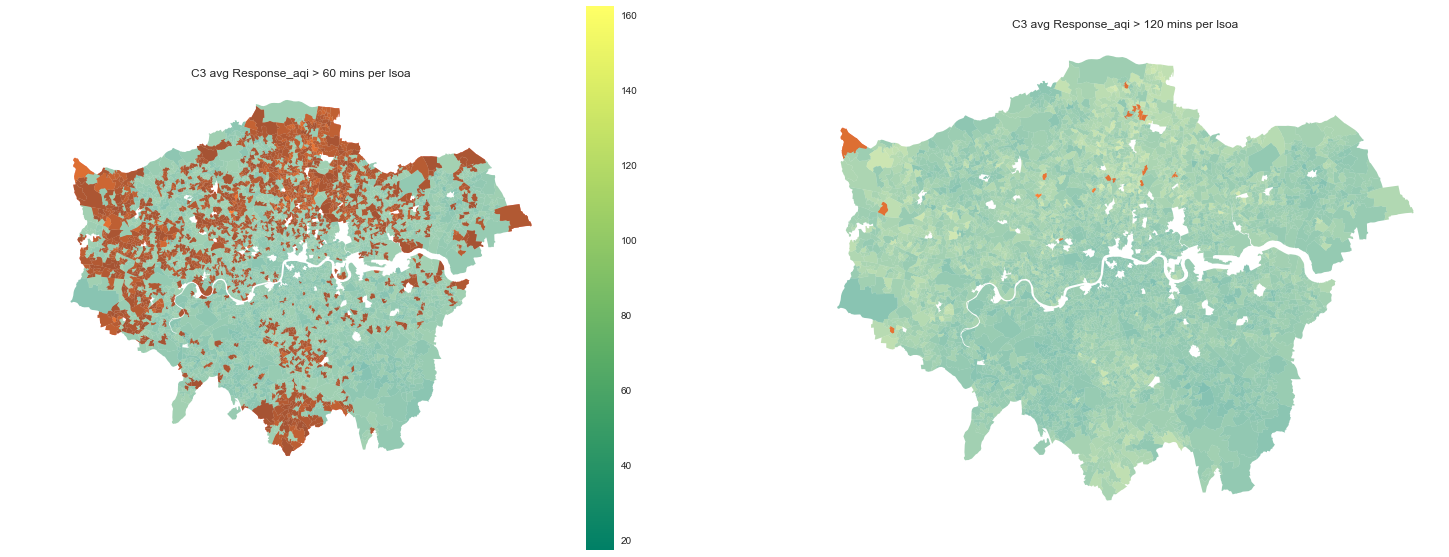

In [135]:
year_c3 = year[year.dohcategory == 'C3']
year_c3 = year_c3.groupby('lsoa')['response_aqi_min'].mean().reset_index().merge(lsoa, left_on='lsoa', 
                                                                             right_on='LSOA11CD')[['lsoa', 'response_aqi_min', 'geometry']]
year_c3 = gpd.GeoDataFrame(year_c3)
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

year_c3[year_c3.response_aqi_min > 60].plot(column='response_aqi_min', color='red', ax=ax[0], alpha=1)
year_c3.plot(column='response_aqi_min', cmap='summer', legend=True, ax=ax[0], alpha=0.5)
ax[0].set_axis_off()
ax[0].set_title('C3 avg Response_aqi < 60 mins per lsoa')

year_c3[year_c3.response_aqi_min > 120].plot(column='response_aqi_min', color='red', ax=ax[1], alpha=1)
year_c3.plot(column='response_aqi_min', cmap='summer', legend=False, ax=ax[1], alpha=0.5)
ax[1].set_axis_off()
ax[1].set_title('C3 avg Response_aqi < 120 mins per lsoa')

Text(0.5, 1.0, 'C4 avg Response_aqi < 180 mins per lsoa')

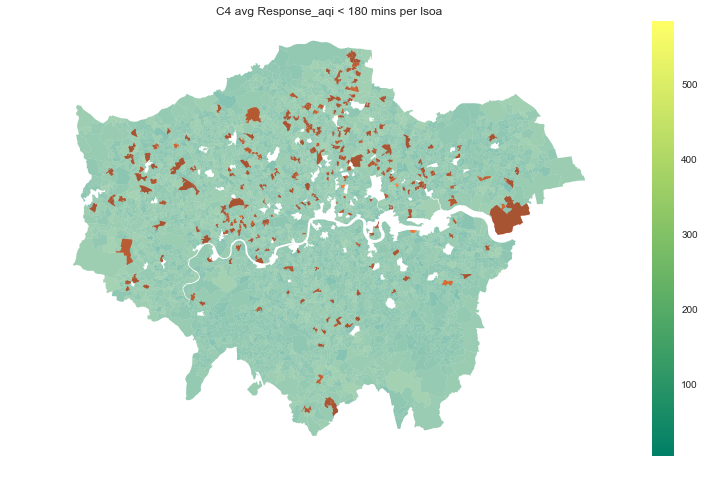

In [139]:
year_c4 = year[year.dohcategory == 'C4']
year_c4 = year_c4.groupby('lsoa')['response_aqi_min'].mean().reset_index().merge(lsoa, left_on='lsoa', 
                                                                             right_on='LSOA11CD')[['lsoa', 'response_aqi_min', 'geometry']]
year_c4 = gpd.GeoDataFrame(year_c4)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
year_c4[year_c4.response_aqi_min > 180].plot(column='response_aqi_min', color='red', ax=ax, alpha=1)
year_c4.plot(column='response_aqi_min', cmap='summer', legend=True, ax=ax, alpha=0.5)
ax.set_axis_off()
ax.set_title('C4 avg Response_aqi < 180 mins per lsoa')